# CP2K - H2O-256

Results from the [CP2K](https://www.cp2k.org/) quantum chemistry and solid state physics package for atomistic simulations using the H20-256 benchmark distributed with the source code.

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show the wallclock time in seconds vs. the number of nodes used for each run. Lower values are better performance. 

In [4]:
df = modules.utils.tabulate_last_perf('Cp2k_H2O_256_*', 'num_nodes', 'runtime_real')
display(HTML(df.to_html()))
ax = df.plot(grid=True, style='o-')
ax.set_xlabel('number of nodes')
ax.set_ylabel('wallclock time (s)')
ax.set_title(test)
plt.tight_layout()

AttributeError: 'NoneType' object has no attribute 'loc'

In [27]:
for test in ['Cp2k_H2O_256_*']:
    df = modules.utils.load_perf_logs('../../perflogs', test, last=True)
    df['case'] = df[['sysname', 'partition', 'environ']].agg('-'.join, axis=1)
    print(df)
    
    df = df.pivot(index='perf_var', columns='case', values='perf_value')
    print(perf_records)

   sysname               partition environ        testname  \
0   alaska    ib-gcc9-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
1   alaska    ib-gcc9-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
2   alaska  roce-gcc9-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
3   alaska  roce-gcc9-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
4   alaska  roce-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
5   alaska  roce-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
8   alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
9   alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
10  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
11  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_1   
12  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_2   
13  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_2   
14  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_2   
15  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_2   
16  alaska    ib-gcc7-openmpi4-ucx    cp2k  Cp2k_H2O_256_8   
17  alas

ValueError: Index contains duplicate entries, cannot reshape


Cp2k_H2O_256_*: runtime_real


case,alaska-ib-gcc7-openmpi4-ucx-cp2k,alaska-ib-gcc9-openmpi4-ucx-cp2k,alaska-ib-openmpi4-ucx-cp2k,alaska-roce-gcc7-openmpi4-ucx-cp2k,alaska-roce-gcc9-openmpi4-ucx-cp2k,alaska-roce-openmpi4-ucx-cp2k
n_nodes,,,,,,
1,751.499,652.977,616.404,727.265,628.536,651.000
2,496.939,NaN,493.092,NaN,NaN,482.429
4,312.768,NaN,325.795,NaN,NaN,324.613
8,194.392,NaN,202.868,NaN,NaN,225.339
16,NaN,NaN,148.672,NaN,NaN,153.338


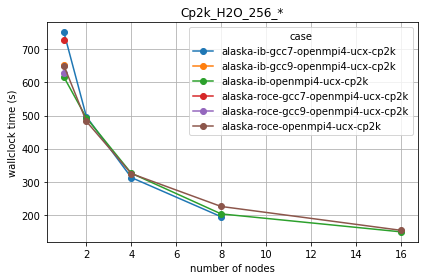

In [19]:
for test in ['Cp2k_H2O_256_*']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../../perflogs', test, '.log')
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    perf_var = 'runtime_real'
    table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_nodes', perf_var)
    ax = table.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('wallclock time (s)')
    ax.set_title(test)
    plt.tight_layout()
    print()
    print('%s: %s' % (test, perf_var))
    display(HTML(table.to_html()))
